<center><h1>Técnicas de Inteligencia Artificial</header1></center>

Presentado por: Steven Fernando Barragan Montero  <br>
Fecha: 18/07/2022

# Importación de librerias necesarias

In [14]:
# Importamos la libreria pandas
import pandas as pd
# Importamos la libreria numpy
import numpy as np

# Carga del dataset
El dataset cuenta con 414 instancias, posee una variable de salida Y, que depende de 6 variables de entrada para poder predecir el precio de una casa. 

In [8]:
#url dataset
url='https://raw.githubusercontent.com/sfbarragan/RegresionLineal/master/Real%20estate.csv'
#cargar datos en base a la url del dataset
df=pd.read_csv(url)

In [9]:
#visualización de los 10 primeros datos
df.head(10)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
5,6,2012.667,7.1,2175.03000,3,24.96305,121.51254,32.1
6,7,2012.667,34.5,623.47310,7,24.97933,121.53642,40.3
7,8,2013.417,20.3,287.60250,6,24.98042,121.54228,46.7
8,9,2013.500,31.7,5512.03800,1,24.95095,121.48458,18.8
9,10,2013.417,17.9,1783.18000,3,24.96731,121.51486,22.1


In [6]:
#desplegar la descripción del dataset
df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


# Descripción de la fuente del Dataset

El dataset contiene la información de 414 casas pertenecientes a una misma zona. Dicho dataset contiene 7 atributos, incluida una característica de clase (objetivo) que indica el precio de la casa. El significado comercial de cada columna (atributo) en los datos es el siguiente:

**Variable Y**<br>
**House price of unit area:** Continuo. Precio de la vivienda por unidad de superficie local (NewTaipei Dollar $10000 por 3,3 metros cuadrados)<br>

**Variables Independientes**<br>

**Transaction date:** Fecha de transacción<br>
**House age:** La edad de la casa en años<br>
**Fistance to neares MRT station:** la distancia a la estación de metro más cercana en metros.<br>
**Number of convenience stores:** el número de tiendas de conveniencia a las que se puede acceder a pie.<br>
**Latitude:** coordenadas de latitud.<br>
**Longitude:** coordenadas de longitud.<br>

# Problema a resolver

Se requiere crear un modelo de aprendizaje automático que permita predecir el precio adecuado de una casa en función de sus especificaciones. Para lo cuál se utilizara el dataset descrito en el apartado anterior, el cuál contiene 414 registros. Donde, la variable objetivo se denomina **"House price of unit area"**. Existen 6 variables de entrada llamadas: **Transaction date, House age, Fistance to neares MRT station, Number of convenience stores, Latitude y Longitude**

# Caracterización del Dataset

# Número de instancias en total

In [10]:
# Contamos los registros del dataset
df.count()

No                                        414
X1 transaction date                       414
X2 house age                              414
X3 distance to the nearest MRT station    414
X4 number of convenience stores           414
X5 latitude                               414
X6 longitude                              414
Y house price of unit area                414
dtype: int64

# Número de atributos de entrada, su significado y tipo.


**Transaction date:** Categorico. Fecha de transacción<br>
**House age:** Continuo. La edad de la casa en años<br>
**Fistance to neares MRT station:** Continuo. la distancia a la estación de metro más cercana en metros.<br>
**Number of convenience stores:** Categorico. el número de tiendas de conveniencia a las que se puede acceder a pie.<br>
**Latitude:** Continuo. coordenadas de latitud.<br>
**Longitude:** Continuo. coordenadas de longitud.<br>

In [13]:
#muestra la información (incluido el tipo de dato) de los 6 atributos de entrada.
df.drop('Y house price of unit area', axis=1).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 22.8 KB


### Mirando la distribución de la variable objetivo

Ya que vamos a programar un modelo de regresión, nos vamos asegurar de que el histograma se vea como una curva de campana o una versión levemente sesgada de la misma. De lo contrario, afecta la capacidad de los algoritmos de aprendizaje automático para aprender todos los escenarios.

<AxesSubplot:>

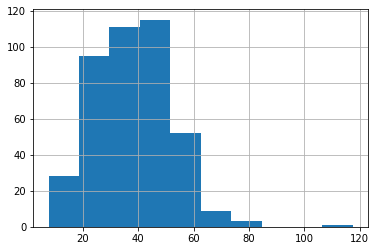

In [16]:
# Establece el backend de matplotlib en el backend 'en línea' 
%matplotlib inline
#Crear gráfico de barras como la variable objetivo (tipo) continua.
df['Y house price of unit area'].hist()

Se puede observar que el histograma posee una curva de campana entre 0 y 85. Por lo tanto, es prudente decir que obtendremos un modelo de regresión con un nivel de aprendizaje aceptable. 

# Análisis exploratorio de datos
>- Variables categóricas: gráfico de barras
>- Variables continuas: Histograma

# Visualización la distribución de todas las variables de entrada categóricas mediante diagramas de barras

In [18]:
# Encontramos los valores unicos para identificar aquellos que son categoricos y los que son continuos
df.nunique()

No                                        414
X1 transaction date                        12
X2 house age                              236
X3 distance to the nearest MRT station    259
X4 number of convenience stores            11
X5 latitude                               234
X6 longitude                              232
Y house price of unit area                270
dtype: int64

Podemos observar que se identifican 2 variables categoricas mediante los datos obtenidos. Por lo general una variable categorica se identifica por que sus valores unicos suelen ser menores a 20 y existe una repetición de esos valores, lo que significa que los datos se agrupan por aquellos valores unicos.

Basandonos en lo antes mencionado, se detectan 2 atributos categoricos: **'transaction date', 'number of convenience stores'**

In [24]:
def PlotBarCharts(inpData, colsToPlot):
    """
    Método PlotBarCharts,
    Este método realizara el gráfico de barras de múltiples datos a la vez, esto lo realizara basandose en las variables categoricas. 
    
    Parametros
        ----------
        inpData : string
            Data con la que se trabajara.
        colsToPlot : List
            Lista con las columnas que se desea mostrar.
  
    """
    
    # Establece el backend de matplotlib en el backend 'en línea' 
    %matplotlib inline
    
    # Importamos la libreria matplotlib
    import matplotlib.pyplot as plt
    
    # Generamos los multiples subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    # Agregamos la leyenda del grafico
    fig.suptitle('Bar charts of: '+ str(colsToPlot))
    
    # Genera la escala de los graficos para cada subplot
    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

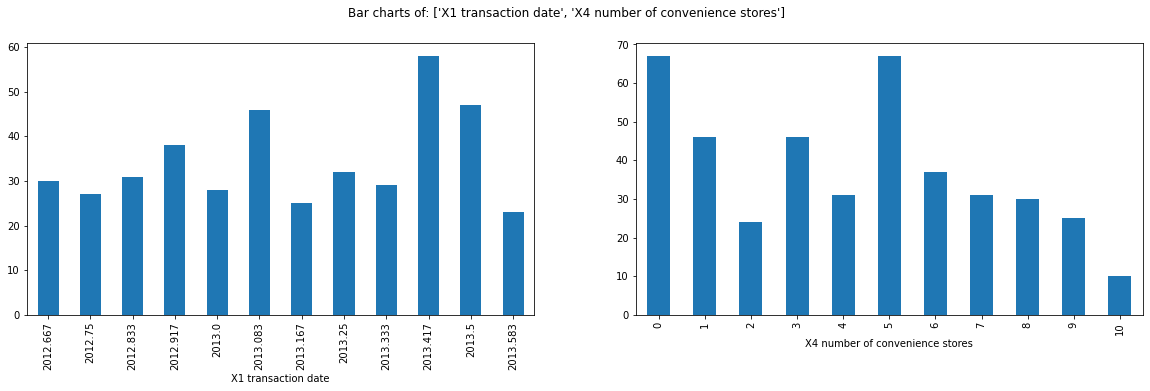

In [26]:
#Llamando a la función PlotBarCharts
PlotBarCharts(inpData=df, colsToPlot=['X1 transaction date', 'X4 number of convenience stores'])

# Interpretación:
Estos gráficos de barras representan las frecuencias de cada categoría en el eje Y y los nombres de las categorías en el eje X.

Los gráficos de barra resultantes poseen una frecuencia comparable, por lo tanto existen suficientes filas para cada categoría en los datos para que el algoritmo de aprendizaje autonomo aprenda.

Variables categóricas seleccionadas:  **transaction date y number of convenience stores**

# Visualizar la distribución de todas las variables continuas usando histogramas

array([[<AxesSubplot:title={'center':'X2 house age'}>,
        <AxesSubplot:title={'center':'X3 distance to the nearest MRT station'}>],
       [<AxesSubplot:title={'center':'X5 latitude'}>,
        <AxesSubplot:title={'center':'X6 longitude'}>]], dtype=object)

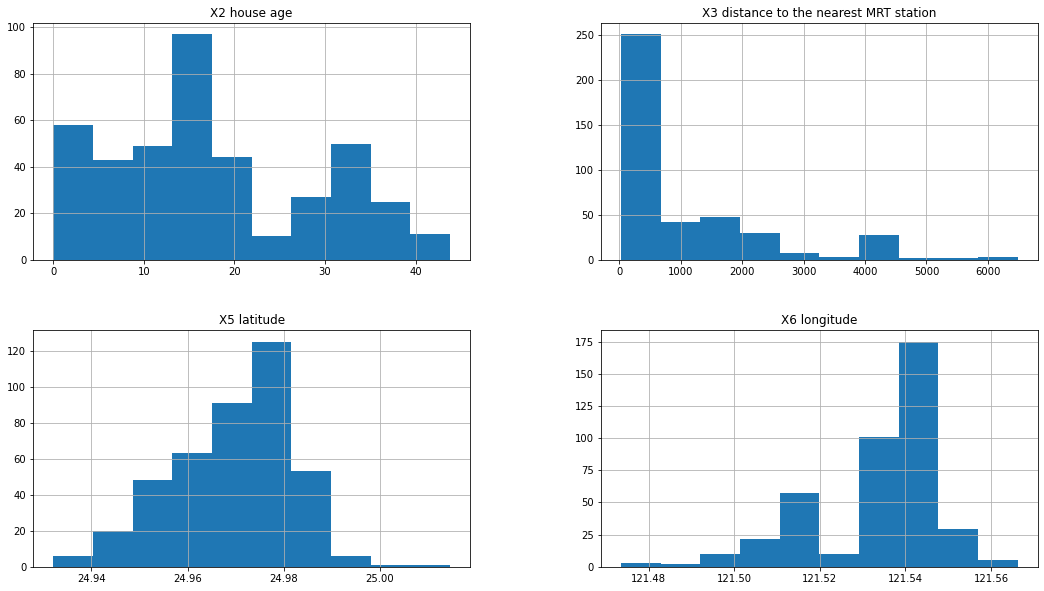

In [27]:
# Plotting histogramas de múltiples columnas juntas
df.hist(['X2 house age','X3 distance to the nearest MRT station','X5 latitude', 'X6 longitude'], figsize=(18,10))

# Interpretación

El eje x muestra el rango de valores y el eje Y representa el número de valores en ese rango. Por ejemplo, en el histograma que representa la columna "House age", existen cerca de 100 registros que posee un valor entre 14 y 17.

Los histogramas resultantes, poseen poca asimetría, por lo cual, no hara falta realizar un tratamiento de valores atipicos, por lo cual aceptamos la columna.


Variables continuas seleccionadas:

    House age: Seleccionado. La distribución es buena.
    Distance to the nearest MRT station: Seleccionado. La distribución es buena.
    latitude: Seleccionado. La distribución es buena.
    longitude: Seleccionado. La distribución es buena.

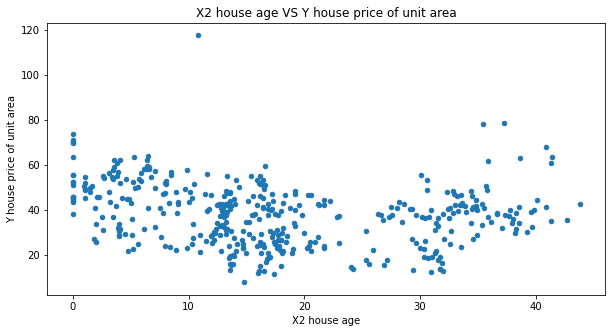

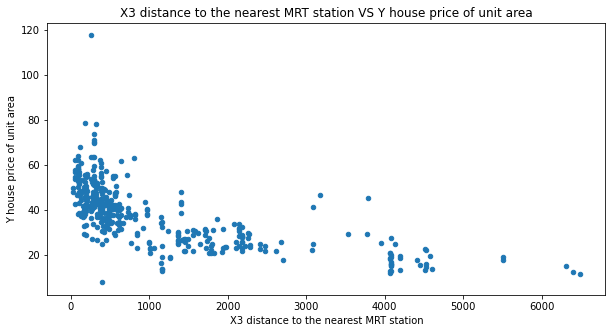

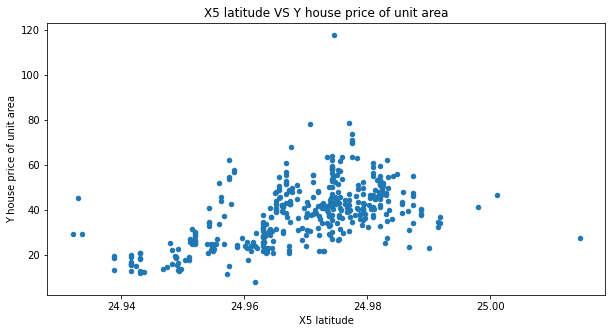

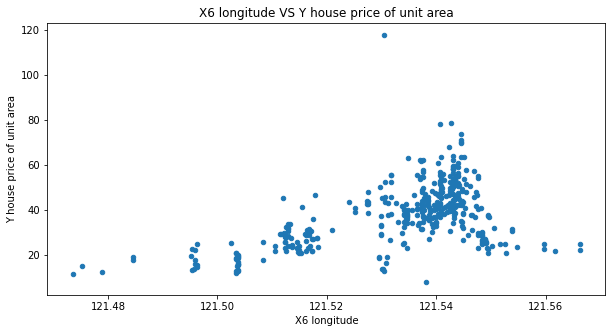

In [29]:
# Definición de las variables continuas
ContinuousCols=['X2 house age','X3 distance to the nearest MRT station','X5 latitude', 'X6 longitude']

# Plotting scatter chart por cada variable de entrada vs varible objetivo
for predictor in ContinuousCols:
    # Grafica de relación entre la variable dependiente y cada una de las variables continuas
    df.plot.scatter(x=predictor, y='Y house price of unit area', figsize=(10,5), title=predictor+" VS "+ 'Y house price of unit area')

# Interpretación

Cada variable posee su propia tendencia, gracias a los graficos de disperción obtenidos podemos identificar las siguientes tendencias:

    House age: Tendencia creciente. Correlacionado.
    Distance to the nearest MRT station: Tendencia decreciente. Correlacionado.
    latitude: Seleccionado. Tendencia creciente. Correlacionado.
    longitude: Seleccionado. Tendencia creciente. Correlacionado.

## Preprocesamiento del dataset. Transformaciones previas necesarias para la modelación

In [33]:
# Define la variable objetivo 
VariableObjetivo=['Y house price of unit area']
# Define las variables de entrada
VariablesEntrada=['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']

In [34]:
# Asignamos a X las variables de entrada
X=df[VariablesEntrada].values
# Asignamos a y la variable objetivo
y=df[VariableObjetivo].values

In [36]:
### Estandarización de la data ###
#Importar la libreria StandardScaler
from sklearn.preprocessing import StandardScaler

# Definimos las variables de entradas escalar
VariablesEntradaScaler=StandardScaler()
# Definimos la variable objetivo escalar
VariableObjetivoScaler=StandardScaler()

In [37]:
#Alimentamos al modelo con la variable de entrada X
VariablesEntradaFit=VariablesEntradaScaler.fit(X)
#Alimentamos al modelo con la variable objetivo y
VariableObjetivoFit=VariableObjetivoScaler.fit(y)

In [38]:
#Generación de los valores estandarizados de X
X=VariablesEntradaFit.transform(X)
#Generación de los valores estandarizados de y
y=VariableObjetivoFit.transform(y)

# División del dataset en datos de entrenamiento y datos de test 

In [39]:
# Importamos train_test_split de la ibreria sklearn.model_selection
from sklearn.model_selection import train_test_split
#Divida los datos en un conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [40]:
#Comprobación rápida del tamaño de los conjuntos de datos de entrenamiento y prueba
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(289, 6)
(289, 1)
(125, 6)
(125, 1)
